# Bharat Intern Machine Learning Internship 2023

# Task 2: Wine Quality Prediction

Machine Learning model to predict the
quality of wine using linear regression
only Jupyter notebook code.

# Name: Manoj Patil

In [1]:
# Importing Required Libraries 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
# Loading Dataset using Pandas

data=pd.read_csv('bharat-winequality-red.csv')

In [3]:
data.head() #  Top 5 rows 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.tail() # Bottom 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
data.shape # No of rows and columns 

(1599, 12)

In [6]:
data.info() # Check null values wrt columns with its data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.isna().sum() # No of null values in columns

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
data.describe() # provide descriptive statistics about a dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# Checking for duplicate Values 

data.duplicated().sum()

240

In [10]:
# Removing duplicates 

data.drop_duplicates(keep = 'first', inplace = True)
data.duplicated().sum()

0

# Data visualization

In [11]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


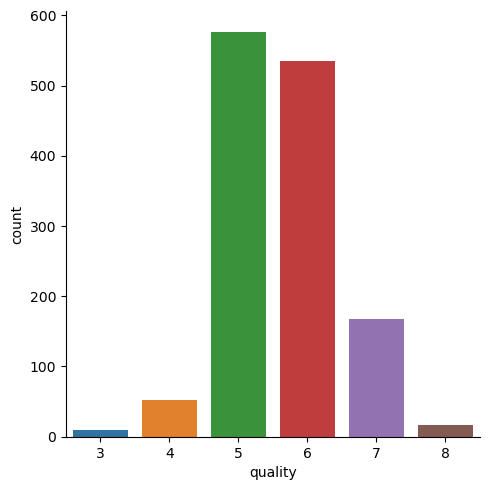

In [13]:
#number of values for each quality

sns.catplot(x = 'quality', data = data, kind = 'count')

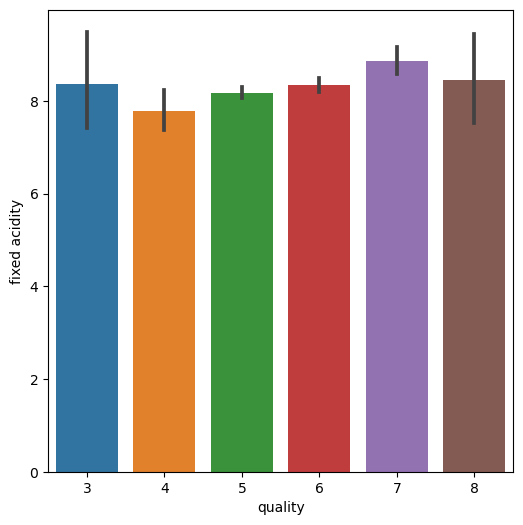

In [14]:
#fixed acidity vs quality

plt.figure(figsize=(6,6)) 

sns.barplot(x ='quality', y='fixed acidity' , data = data)

plt.show()


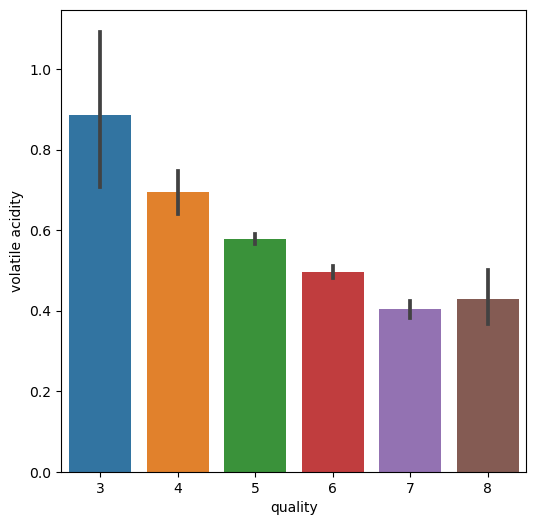

In [15]:
#volitile acidity vs quality

plt.figure(figsize=(6,6))
sns.barplot(x ='quality', y='volatile acidity', data = data)
plt.show()


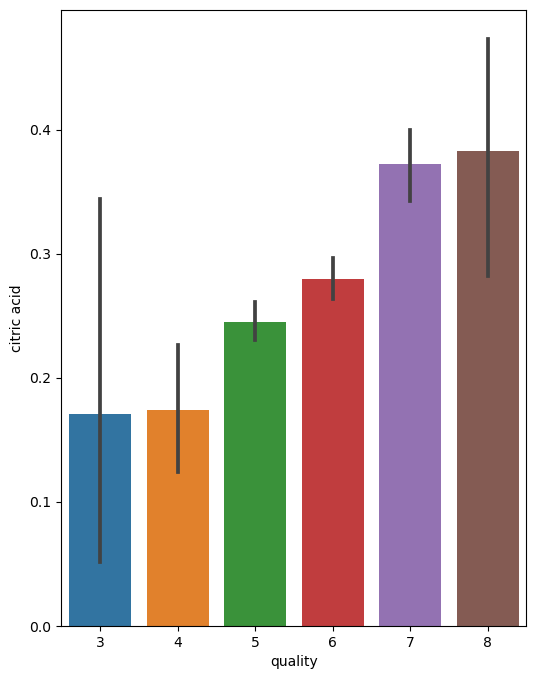

In [16]:
#citric acid vs quality

plt.figure(figsize=(6,8))
sns.barplot(x ='quality', y='citric acid', data = data)
plt.show()

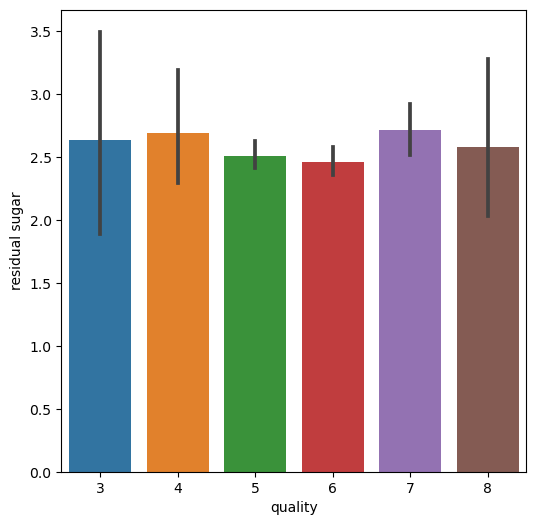

In [17]:
#residual sugar vs quality

plt.figure(figsize=(6,6))
sns.barplot(x ='quality', y='residual sugar', data = data)
plt.show()

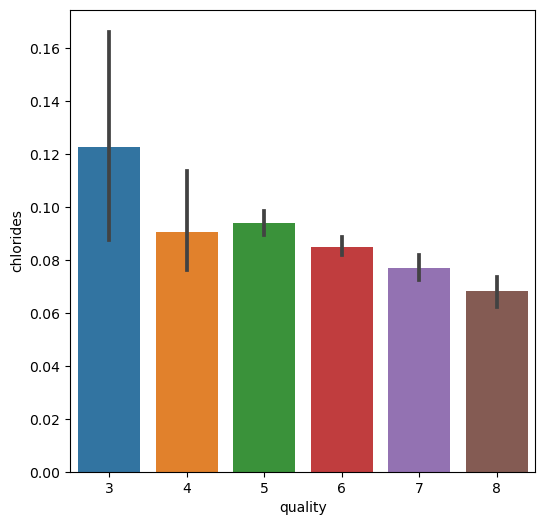

In [18]:
#chlorides vs quality
plt.figure(figsize=(6,6))
sns.barplot(x ='quality', y='chlorides', data = data)
plt.show()

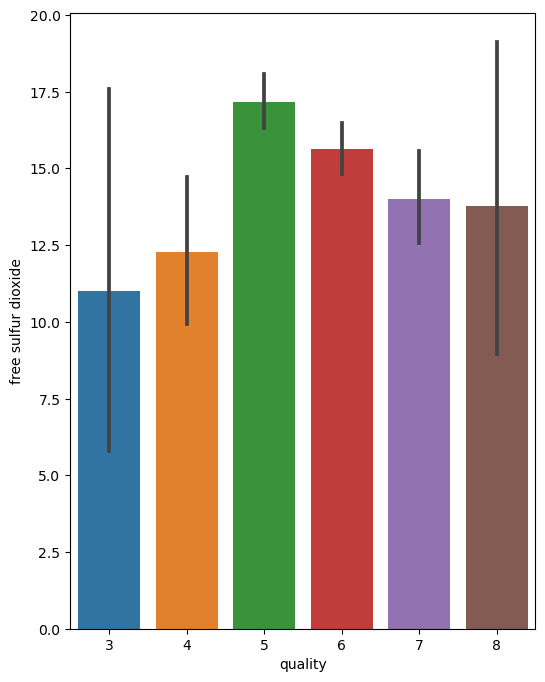

In [19]:
#free sulfur dioxide vs quality

plt.figure(figsize=(6,8))

sns.barplot(x ='quality', y='free sulfur dioxide', data =data)
plt.show()

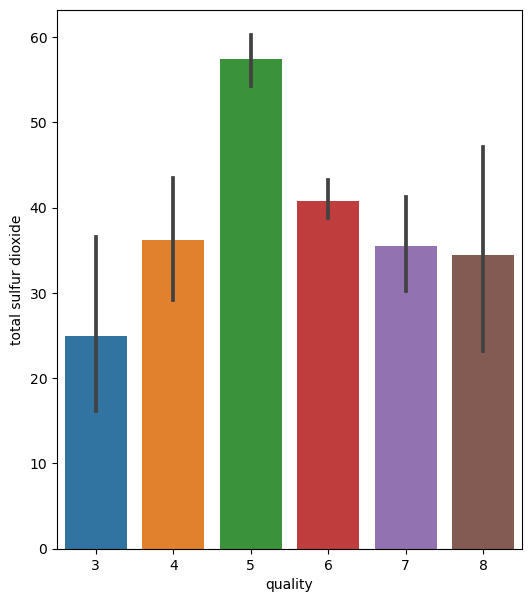

In [20]:
#total sulfur dioxide vs quality


plt.figure(figsize=(6,7))
sns.barplot(x ='quality', y='total sulfur dioxide', data = data)
plt.show()

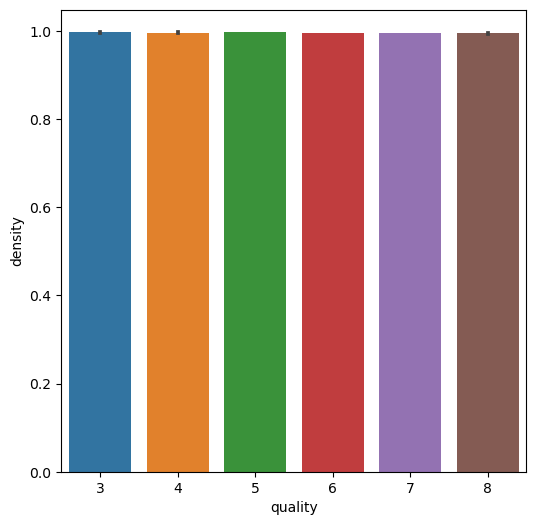

In [21]:
#density vs quality

plt.figure(figsize=(6,6))
sns.barplot(x ='quality', y='density', data = data)
plt.show()

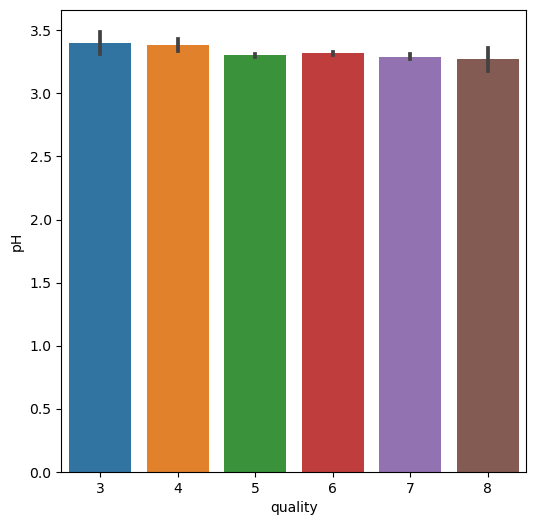

In [22]:
#pH vs quality

plt.figure(figsize=(6,6))
sns.barplot(x ='quality', y='pH', data = data)
plt.show()

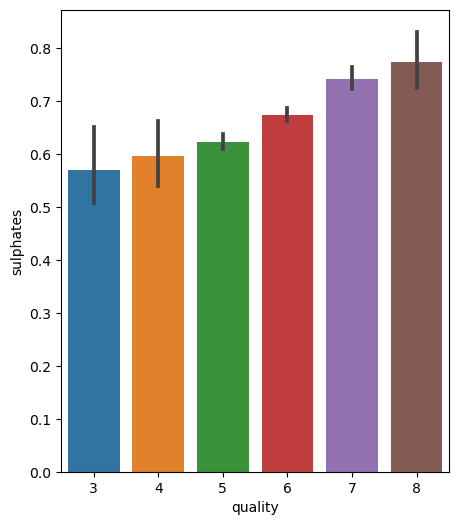

In [23]:
#sulphates vs quality

plt.figure(figsize=(5,6))
sns.barplot(x ='quality', y='sulphates', data = data)
plt.show()

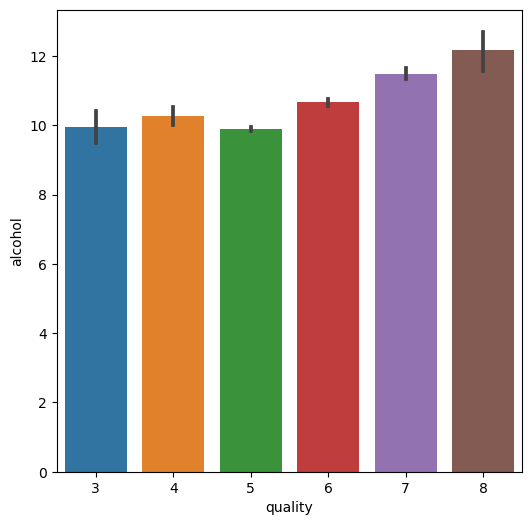

In [24]:
# Alcohol vs quality

plt.figure(figsize=(6,6))
sns.barplot(x ='quality', y='alcohol', data = data)
plt.show()

WE CAN SEE THAT 

Quality increases volatile acidity and chlorides decreases.



Quality increases citric acid and sulphates increases.

# NOW CHECKING FOR CORRELATION 

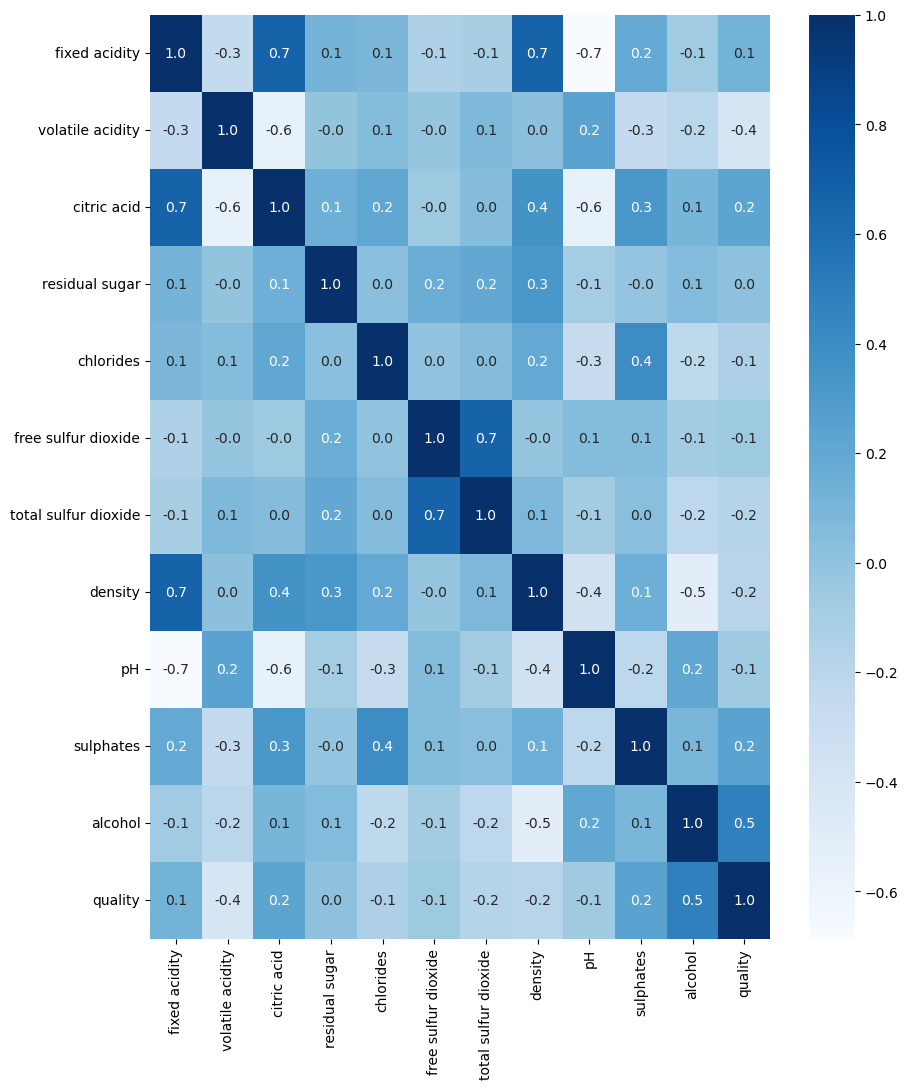

In [25]:
# Using heatmeap

plt.figure(figsize=(10,12))
sns.heatmap(data.corr(), annot = True, cmap = 'Blues', fmt = '.1f')
plt.show()

# Data Preprocessing

# Splitting data into Label and Features (X & Y)

In [26]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [28]:
x=data.drop('quality', axis=1)

In [29]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [30]:
y=data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [31]:
y

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1359, dtype: int64

# Splitting the dataset into training and Testing

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [33]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1171,7.1,0.59,0.00,2.2,0.078,26.0,44.0,0.99522,3.42,0.68,10.8
1015,10.5,0.39,0.46,2.2,0.075,14.0,27.0,0.99598,3.06,0.84,11.4
1379,7.5,0.57,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.8
18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0
1007,9.1,0.30,0.34,2.0,0.064,12.0,25.0,0.99516,3.26,0.84,11.7
...,...,...,...,...,...,...,...,...,...,...,...
888,6.8,0.57,0.00,2.5,0.072,32.0,64.0,0.99491,3.43,0.56,11.2
979,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
1434,10.2,0.54,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0
646,7.3,0.67,0.05,3.6,0.107,6.0,20.0,0.99720,3.40,0.63,10.1


In [34]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1133,7.2,0.480,0.07,5.5,0.089,10.0,18.0,0.99684,3.37,0.68,11.2
760,9.0,0.580,0.25,2.8,0.075,9.0,104.0,0.99779,3.23,0.57,9.7
1173,7.6,0.360,0.31,1.7,0.079,26.0,65.0,0.99716,3.46,0.62,9.5
1079,7.9,0.300,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3
935,8.8,0.300,0.38,2.3,0.060,19.0,72.0,0.99543,3.39,0.72,11.8
...,...,...,...,...,...,...,...,...,...,...,...
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2
882,8.4,0.310,0.29,3.1,0.194,14.0,26.0,0.99536,3.22,0.78,12.0
929,8.7,0.330,0.38,3.3,0.063,10.0,19.0,0.99468,3.30,0.73,12.0
135,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6


In [35]:
y_train

1171    0
1015    0
1379    0
18      0
1007    1
       ..
888     0
979     0
1434    0
646     0
792     0
Name: quality, Length: 951, dtype: int64

In [36]:
y_test

1133    1
760     0
1173    0
1079    1
935     0
       ..
1478    0
882     0
929     1
135     0
681     0
Name: quality, Length: 408, dtype: int64

In [37]:
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1359, 11) (951, 11) (408, 11)
(1359,) (951,) (408,)


# Train the Algorithm

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf= RandomForestClassifier()

In [40]:
rf.fit(x_train,y_train)

RandomForestClassifier()

# Predecting the test data set(x_test)

In [41]:
y_pred=rf.predict(x_test) 

In [42]:
y_pred# model predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [43]:
y_test

1133    1
760     0
1173    0
1079    1
935     0
       ..
1478    0
882     0
929     1
135     0
681     0
Name: quality, Length: 408, dtype: int64

In [44]:
#Accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

82.84313725490196

# Predictive System 

In [45]:
input_data = (7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

#changing the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)


#reshapr the data

reshaped_data = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(reshaped_data)
print(prediction)

if (prediction) == 1:
    print("It's a Good quality Wine")
else:
    print("It's a Bad quality Wine")

[1]
It's a Good quality Wine
